In [1]:
#matplotlib inline magic command
%matplotlib inline

#import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load =  'Resources/ride_data.csv'

In [3]:
#read csv files and store it into a pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

#city_data_df.head()

###### inspecting city_data_df

In [4]:
#checking if any missing rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
#checking for any null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#checking for the data type in each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
#checking for how many types of data points on the city dataset
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
#get the number of data points from urban areas
sum(city_data_df['type'] == 'Urban')

66

In [9]:
#get the number of data points from the suburban areas
sum(city_data_df['type']== 'Suburban')

36

In [10]:
#get the number of data points from the rural areas
sum(city_data_df['type']== 'Rural')

18

###### inspecting ride_data_df

In [11]:
#checking for any missing rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
#checking for any null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
#checking for different data types per column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

###### merging ride_data and city_data dataframes

In [14]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on = ['city', 'city'])


#pyber_data_df.head()

###### creating a bubble chart to showcase the average fare versus the total number of rides based on the average number of drivers for each city type (urban, suburban, rural)

In [15]:
#create a new dataframe for each city type

#urban
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

#suburban
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

#rural
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [16]:
#get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

#get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

#get the number of rides for the rural cities
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [17]:
#get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

#get the average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

#get the averahe fare for eacj city in the rural cities
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']


In [18]:
#get the average number of drivers per city in the urban cities
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

#get the average number of drivers per city in the suburban cities
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

#get the average number of drivers per city in the rural cities
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

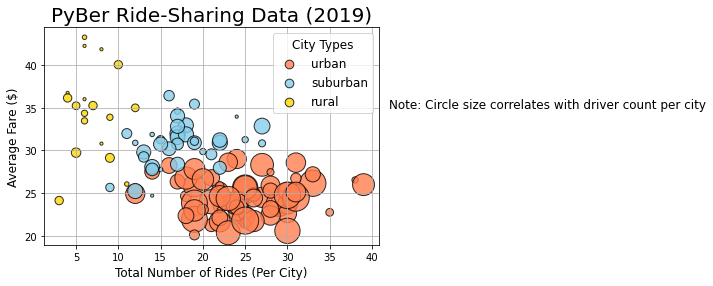

In [19]:
#creating the scatter plot for the urban cities
plt.scatter(x = urban_ride_count,
            y = urban_avg_fare,
            s = 10* urban_driver_count,
            c = 'coral',
            edgecolor = 'black',
            linewidth = 1,
            alpha = 0.8,
            label = 'urban')



#creating the scatter plot for the suburban cities
plt.scatter(x = suburban_ride_count,
            y = suburban_avg_fare,
            s = 10* suburban_driver_count,
            c = 'skyblue',
            edgecolor = 'black',
            linewidth = 1,
            alpha = 0.8,
            label = 'suburban')




#creating the scatter plot for the rural cities
plt.scatter(x = rural_ride_count,
            y = rural_avg_fare,
            s = 10* rural_driver_count,
            c = 'gold',
            edgecolor = 'black',
            linewidth = 1,
            alpha = 0.8,
            label = 'rural')

#Adds appropriate titles for all the graphs
plt.title('PyBer Ride-Sharing Data (2019)', fontsize = 20)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.grid(True)


#Adds the legend/label
lgnd = plt.legend(fontsize = 12, mode = 'Expanded', 
                  scatterpoints = 1, loc = 'best', title = 'City Types')


#Use legendHandles[] to set the font size of the marker
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporates a text box about the circle size beside the chart where '42 and 35' are x'y coordinates
plt.text(42, 35, 'Note: Circle size correlates with driver count per city', fontsize = 12)

#save the figure
plt.savefig('Analysis/Fig1.png')

#combine and show the plot
plt.show()

###### pandas summary statistics for number of rides by city type

In [20]:
#get summary statistics for the urban cities
#urban_cities_df.describe()

#get summary statistics for the suburban cities
#suburban_cities_df.describe()

#get summary statistics for the rural cities
#rural_cities_df.describe()

#get the summary statistics for the suburban ride count
#rural_ride_count.describe()

In [21]:
#calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [22]:
#calculate the mean of the ride count for the urban cities
round(urban_ride_count.median(), 2)

24.0

In [23]:
#calculate the mode of the ride count for urban cities
round(urban_ride_count.mode(), 2)

0    22
1    25
dtype: int64

###### numpy summary statistics (numpy mean/median/mode) + (scipy mode) functions

In [24]:
#an optional approach to calculating mean/median/mode of a dataframe and series for when working with
#VS Code or other python interpreter

#import numpy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [25]:
#calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'the mean for the ride count for urban trips is {mean_urban_ride_count:.2f}')

median_urban_ride_count = np.median(urban_ride_count)
print(f'the median for the ride count for urban trips is {median_urban_ride_count}')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'the mode for the ride count for urban trip is {mode_urban_ride_count}')


the mean for the ride count for urban trips is 24.62
the median for the ride count for urban trips is 24.0
the mode for the ride count for urban trip is ModeResult(mode=array([22], dtype=int64), count=array([7]))


###### summary statistics for fare by city type

In [26]:
#get the fares for the urban cities
urban_fares = urban_cities_df['fare']

#get the fares for suburban cities
suburban_fares = suburban_cities_df['fare']


#get the fares for rural cities
rural_fares = rural_cities_df['fare']

In [27]:
#calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f'the mean for the urban fares for urban trips is {mean_urban_fares:.2f}')

median_urban_fares = np.median(urban_fares)
print(f'the median for the urban fares for urban trips is {median_urban_fares}')

mode_urban_fares = sts.mode(urban_fares)
print(f'the mode for the urban fares for urban trip is {mode_urban_fares}')


the mean for the urban fares for urban trips is 24.53
the median for the urban fares for urban trips is 24.64
the mode for the urban fares for urban trip is ModeResult(mode=array([22.86]), count=array([5]))


###### summary statistics for the number of drivers by city type

In [28]:
#get the driver count for the urban cities
urban_drivers = urban_cities_df['driver_count']

#get the driver count for the suburban cities
suburban_drivers = suburban_cities_df['driver_count']

#get the driver count for the urban cities
rural_drivers = rural_cities_df['driver_count']

In [29]:
#calculate the measures of central tendency for the number of drivers by city type
mean_urban_drivers = np.mean(urban_drivers)
print(f'the mean for urban drivers is {mean_urban_drivers:.2f}')

median_urban_drivers = np.median(urban_drivers)
print(f'the median for urban drivers is {median_urban_drivers}')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'the mode for urban drivers is {mode_urban_drivers}')

the mean for urban drivers is 36.68
the median for urban drivers is 37.0
the mode for urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86]))


###### box and whisker plot for the ride count

<function matplotlib.pyplot.show(close=None, block=None)>

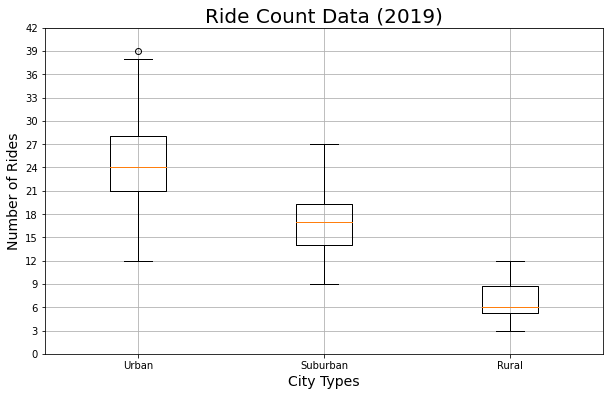

In [30]:
#create a box and whisker plot for the urban cities ride count
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize = (10, 6))


#add the title, y_axis label and grid
ax.set_title('Ride Count Data (2019)', fontsize =20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()

#save the figure
plt.savefig('Analysis/Fig2.png')
plt.show

In [31]:
#filtering for the true values for the outlier
urban_city_outlier = urban_ride_count[ urban_ride_count == 39].index[0]
print(f'{urban_city_outlier} has the highest rider count')

West Angela has the highest rider count


###### box and whisker plot for the ride fare data

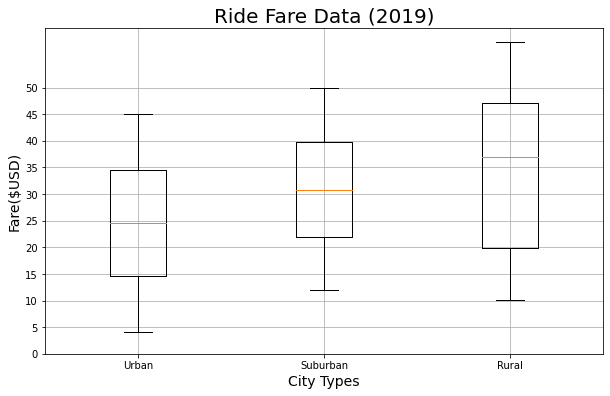

In [32]:
#create a box and whisker plot for the city type fare data
x_labels =['Urban', 'Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]


fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(fare_data, labels = x_labels)

#add the title, y_axis, and grid
ax.set_title('Ride Fare Data (2019)', fontsize = 20)
ax.set_ylabel('Fare($USD)', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0,51, step = 5.0))
ax.grid()


#save figure
plt.savefig('Analysis/Fig3.png')
plt.show()

###### box and whisker plots for driver count data

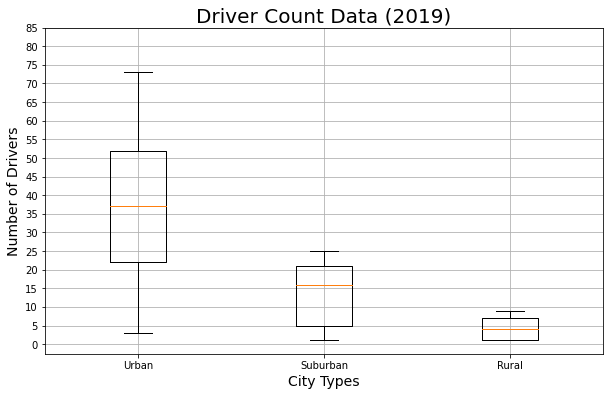

In [37]:
#create a box and whisker plot for the city type driver count data
x_labels = ['Urban', 'Suburban', 'Rural']
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(driver_data, labels = x_labels)

#add the title, y_axis, and grid
ax.set_title('Driver Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()

#save figure
plt.savefig('Analysis/Fig4.png')
plt.show()

#print summary
#print('Summary Statistics')
#print(f'{urban_drivers.describe()} {suburban_drivers.describe()} {rural_drivers.describe()}')
